In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

2021-12-22 00:00:31.440140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 00:00:31.440168: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Creating a deep learning network

A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

Here, you will create a network that has two convolutional layers.
* Instructions

    * The first convolutional layer is the input layer of the network. This should have 15 units with kernels of 2 by 2 pixels. It should have a 'relu' activation function. It can use the variables img_rows and img_cols to define its input_shape.
    * The second convolutional layer receives its inputs from the first layer. It should have 5 units with kernels of 2 by 2 pixels. It should also have a 'relu' activation function.


In [2]:
img_rows, img_cols = 28, 28

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [3]:
(train_data, train_labels), \
                    (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_data = train_data[(train_labels >= 0)\
                        & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

In [5]:
test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

### Keras pooling layers

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before:

Convolution => Convolution => Flatten => Dense

However, you will also add a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

Convolution => Max pooling => Convolution => Flatten => Dense

A Sequential model along with Dense, Conv2D, Flatten, and MaxPool2D objects are available in your workspace.
* Instructions

    * Add an input convolutional layer (15 units, kernel size of 2, relu activation).
    * Add a maximum pooling operation (pooling over windows of size 2x2).
    * Add another convolution layer (5 units, kernel size of 2, relu activation).
    * Flatten the output of the second convolution and add a Dense layer for output (3 categories, softmax activation).



In [6]:
from keras.layers import MaxPool2D
model2 = Sequential()

# Add a convolutional layer
model2.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model2.add(MaxPool2D(2))

# Add another convolutional layer
model2.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 5)         305       
_________________________________________________________________
flatten (Flatten)            (None, 720)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 2163      
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________


2021-12-22 00:00:33.923147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-22 00:00:33.923194: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-22 00:00:33.923233: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Rabie): /proc/driver/nvidia/version does not exist
2021-12-22 00:00:33.923528: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Compile model
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model2.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model2.evaluate(test_data, test_labels, batch_size=10)

2021-12-22 00:00:34.279620: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-22 00:00:34.280086: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2394475000 Hz


Epoch 1/3
4/4 [==============================] - 18s 161ms/step - loss: 24.8861 - accuracy: 0.3667 - val_loss: 12.1646 - val_accuracy: 0.4000
Epoch 2/3
4/4 [==============================] - 0s 14ms/step - loss: 11.3351 - accuracy: 0.3933 - val_loss: 1.7711 - val_accuracy: 0.7000
Epoch 3/3
1/1 [==============================] - 0s 14ms/step - loss: 1.4863 - accuracy: 0.8000


[1.486342430114746, 0.800000011920929]

In [8]:
from keras.callbacks import ModelCheckpoint

# This checkpoint object will store the model parameters
# in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
# Store in a list to be used during training
callbacks_list = [checkpoint]


### Plot the learning curves

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.
* Instructions

    * Fit the model to the training data (train_data).
    * Use a validation split of 20%, 3 epochs and batch size of 10.
    * Plot the training loss.
    * Plot the validation loss.


Epoch 1/3
4/4 [==============================] - 0s 20ms/step - loss: 1.5495 - accuracy: 0.7000 - val_loss: 0.0894 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 12ms/step - loss: 0.4699 - accuracy: 0.9000 - val_loss: 0.6932 - val_accuracy: 0.9000
Epoch 3/3
4/4 [==============================] - 0s 15ms/step - loss: 0.4454 - accuracy: 0.9250 - val_loss: 0.8734 - val_accuracy: 0.8000


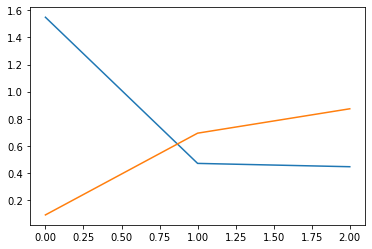

In [9]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model2.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10, callbacks=callbacks_list)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

### Using stored weights to predict in a test set

Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. test_data).

In [10]:
# Load the weights from file
model2.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model2.predict(test_data[:3])

array([[1.3484937e-23, 5.6163375e-33, 1.0000000e+00],
       [1.9261641e-12, 1.0000000e+00, 1.0164177e-16],
       [2.5225599e-10, 9.9999964e-01, 4.1510873e-07]], dtype=float32)

### Adding dropout to your network

Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:

* Convolution (15 units, kernel size 2, 'relu' activation)
* Dropout (20%)
* Convolution (5 units, kernel size 2, 'relu' activation)
* Flatten
* Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.

In [11]:
from keras.layers import Dropout
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

### Add batch normalization to your network

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:

* Convolution (15 units, kernel size 2, 'relu' activation)
* Batch normalization
* Convolution (5 unites, kernel size 2, 'relu' activation)
* Flatten
* Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.

In [13]:
from keras.layers import BatchNormalization,Conv2D
model3 = Sequential()

# Add a convolutional layer
model3.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add batch normalization layer
model3.add(BatchNormalization())

# Add another convolutional layer
model3.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model3.add(Flatten())
model3.add(Dense(3, activation='softmax'))

In [15]:
model3.layers[0].get_weights()

[array([[[[-0.11963275,  0.2413415 ,  0.03992316,  0.13656375,
           -0.07018296, -0.23446281,  0.10438529,  0.15317443,
            0.15457335,  0.04838684, -0.18231463, -0.03348941,
            0.04724482, -0.19558801, -0.18724638]],
 
         [[ 0.06677115,  0.22325704, -0.1516061 , -0.22192258,
            0.14164364, -0.26261926,  0.27078864,  0.10053349,
            0.14987087,  0.26489   ,  0.2083101 ,  0.0960106 ,
            0.05354118, -0.1640937 , -0.11456148]]],
 
 
        [[[-0.01248249, -0.0834662 , -0.3028851 , -0.00348899,
            0.15421915,  0.08237776, -0.01248637,  0.11499971,
           -0.00457788,  0.14315993,  0.0229966 ,  0.1007925 ,
           -0.04562882, -0.19663309,  0.29258034]],
 
         [[ 0.1464816 ,  0.25604168, -0.0038366 ,  0.08809575,
            0.17426604, -0.0631744 , -0.13426936, -0.08236653,
            0.20829579, -0.07570851,  0.095305  , -0.0181607 ,
           -0.2078878 , -0.19212064, -0.10652727]]]], dtype=float32),
 array([0

### Extracting a kernel from a trained network

One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file.

In [21]:
# Load the weights into the model
model2.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model2.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

[[-0.12829943 -0.2166776 ]
 [ 0.09835991  0.20409702]]
